# GNN-LRP - Projet 6

Van Duy Le / Radja Djihane Elmiri

In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00


In [ ]:
import igraph
import numpy as np


def relevance_curves_xy_computation(nodes_x_coors_list: list, nodes_y_coors_list: list):
    """
    Cette méthode calcule les coordonnées des courbes de pertinence pour les parcours dans un graphe.
    :param nodes_x_coors_list: Liste des coordonnées x des nœuds dans la marche
    :param nodes_y_coors_list: Liste des coordonnées y des nœuds dans la marche
    :return: coordonnées x et y des courbes de pertinence
    """

    # Modification des coordonnées des nœuds pour tester une autre configuration
    nodes_x_coors_list = [0, 2, 4]  # Modification des coordonnées x des nœuds
    nodes_y_coors_list = [0, 2, 0]  # Modification des coordonnées y des nœuds

    relevance_line_curve_x_coors_list = np.array(nodes_x_coors_list)
    relevance_line_curve_y_coors_list = np.array(nodes_y_coors_list)

    # Si les nœuds sont identiques, générer un cercle autour du point
    if relevance_line_curve_x_coors_list[0] == relevance_line_curve_x_coors_list[1] == relevance_line_curve_x_coors_list[2] and \
            relevance_line_curve_y_coors_list[0] == relevance_line_curve_y_coors_list[1] == relevance_line_curve_y_coors_list[2]:
        relevance_line_curve_x_coors_list = relevance_line_curve_x_coors_list[0] + 0.1 * np.cos(np.linspace(0, 2 * np.pi, 50))
        relevance_line_curve_y_coors_list = relevance_line_curve_y_coors_list[0] + 0.1 * np.sin(np.linspace(0, 2 * np.pi, 50))
    else:
        # Modification des coordonnées pour relier les trois nœuds
        relevance_line_curve_x_coors_list = 0.75 * relevance_line_curve_x_coors_list + 0.25 * relevance_line_curve_x_coors_list.mean()
        relevance_line_curve_y_coors_list = 0.75 * relevance_line_curve_y_coors_list + 0.25 * relevance_line_curve_y_coors_list.mean()

        # Crée des segments de ligne pour chaque nœud
        relevance_line_curve_x_coors_list = np.concatenate([
            np.linspace(relevance_line_curve_x_coors_list[0], relevance_line_curve_x_coors_list[0], 41),
            np.linspace(relevance_line_curve_x_coors_list[0], relevance_line_curve_x_coors_list[1], 20),
            np.linspace(relevance_line_curve_x_coors_list[1], relevance_line_curve_x_coors_list[2], 20),
            np.linspace(relevance_line_curve_x_coors_list[2], relevance_line_curve_x_coors_list[2], 41), ])
        relevance_line_curve_y_coors_list = np.concatenate([
            np.linspace(relevance_line_curve_y_coors_list[0], relevance_line_curve_y_coors_list[0], 41),
            np.linspace(relevance_line_curve_y_coors_list[0], relevance_line_curve_y_coors_list[1], 20),
            np.linspace(relevance_line_curve_y_coors_list[1], relevance_line_curve_y_coors_list[2], 20),
            np.linspace(relevance_line_curve_y_coors_list[2], relevance_line_curve_y_coors_list[2], 41)])

        filt = np.exp(-np.linspace(-2, 2, 41) ** 2)
        filt = filt / filt.sum()

        # Applique une convolution pour adoucir la courbe
        relevance_line_curve_x_coors_list = np.convolve(relevance_line_curve_x_coors_list, filt, mode='valid')
        relevance_line_curve_y_coors_list = np.convolve(relevance_line_curve_y_coors_list, filt, mode='valid')

    return relevance_line_curve_x_coors_list, relevance_line_curve_y_coors_list


def compute_walks(adj_matrix: np.ndarray):
    """
    Calcule tous les parcours de longueur 3 dans le graphe.
    :param adj_matrix: Matrice d'adjacence du graphe
    :return: liste des marches de longueur 3
    """
    w = []

    # Modification de la matrice d'adjacence pour tester un autre graphe
    adj_matrix = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])  # Exemple de matrice d'adjacence modifiée

    for v1 in np.arange(len(adj_matrix)):
        for v2 in np.where(adj_matrix[v1])[0]:
            for v3 in np.where(adj_matrix[v2])[0]:
                w += [(v1, v2, v3)]

    return w


def set_graph_layout(adj_matrix: np.ndarray, seed):
    """
    Crée un graphe et définit la disposition des nœuds en utilisant la matrice d'adjacence.
    :param adj_matrix: Matrice d'adjacence
    :param seed: Graine aléatoire pour l'initialisation du graphe
    :return: Coordonnées des nœuds selon un layout
    """
    # Création du graphe avec igraph
    graph = igraph.Graph()
    graph.add_vertices(len(adj_matrix))
    graph.add_edges(zip(*np.where(adj_matrix == 1)))

    # Utilisation du layout Fruchterman-Reingold (une autre disposition possible)
    return np.array(list(graph.layout_fruchterman_reingold()))


# Exemple d'utilisation du code avec des données modifiées

# Coordonnées des nœuds pour la pertinence
nodes_x = [0, 2, 4]
nodes_y = [0, 2, 0]
curve_x, curve_y = relevance_curves_xy_computation(nodes_x, nodes_y)
print("Coordonnées des courbes de pertinence :")
print(curve_x)
print(curve_y)

# Matrice d'adjacence pour les marches
adj_matrix = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
walks = compute_walks(adj_matrix)
print("\nMarche de longueur 3 :")
print(walks)

# Calcul du layout du graphe
graph_layout = set_graph_layout(adj_matrix, seed=42)
print("\nDisposition des nœuds dans le graphe :")
print(graph_layout)


Coordonnées des courbes de pertinence :
[0.5        0.5        0.50008188 0.50028471 0.50066263 0.50128901
 0.502261   0.5037042  0.50577715 0.50867503 0.51263215 0.51792242
 0.52485739 0.5337812  0.54506239 0.55908246 0.57622166 0.59684266
 0.62127337 0.64979002 0.68260209 0.71975853 0.76134664 0.80730684
 0.85748909 0.91166015 0.9695153  1.03069373 1.09479609 1.16140303
 1.23009343 1.30046114 1.37212939 1.44476226 1.51807286 1.59182817
 1.66585052 1.7400162  1.81425124 1.88852527 1.96284356 2.03715644
 2.11147473 2.18574876 2.2599838  2.33414948 2.40817183 2.48192714
 2.55523774 2.62787061 2.69953886 2.76990657 2.83859697 2.90520391
 2.96930627 3.0304847  3.08833985 3.14251091 3.19269316 3.23865336
 3.28024147 3.31739791 3.35020998 3.37872663 3.40315734 3.42377834
 3.44091754 3.45493761 3.4662188  3.47514261 3.48207758 3.48736785
 3.49132497 3.49422285 3.4962958  3.497739   3.49871099 3.49933737
 3.49971529 3.49991812 3.5        3.5       ]
[0.16666667 0.16666667 0.16674855 0.1669513

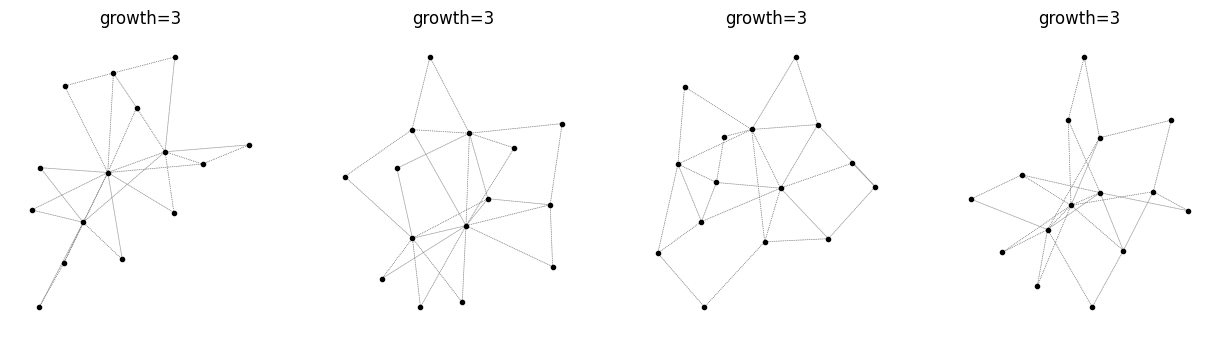

In [ ]:
import random
import sys

import igraph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch


########################################################################################################################
# [A.] Create example graphs and plots thereof =========================================================================
########################################################################################################################
def create_scale_free_graph(nodes_nr: int, input_seed: int = 0, embed: bool = False, growth=None):
    """
    # Implementation of the Barabasi-Albert model for the creation of scale-free graphs.
    A scale-free graph has a degree distribution that follows a power law - asymptotically.
    The fraction P(k) of nodes in the network having k connections to other nodes goes for large values of k:
    P(k) ∼ pow(k, −γ)
    In this method the γ (gamma) is sampled uniformly being either 1, 2, or 3.

    :param nodes_nr: Number of graph nodes
    :param input_seed: Seed for the random generation
    :param embed: Parameter that will be used for visualization
    :param growth: Growth parameter of the Barabasi-Albert (BA) method. The scale-free graph increases over time.
    At each timestep a new node with "growth" number of links that connect the new node to "growth" number of nodes
    already in the network is added.
    :return:
    """

    # [1.] Define number of nodes and the adjacency matrix -------------------------------------------------------------
    adj_matrix = np.zeros([nodes_nr, nodes_nr])     # Adjacency Matrix
    adj_matrix[1, 0] = 1
    adj_matrix[0, 1] = 1

    # The generated graph that increases over time. At each timestep a new node with "growth" number of links that -----
    # connect the new node to "growth" number of nodes already in the network is added ---------------------------------
    random = np.random.mtrand.RandomState(input_seed)
    growth = growth if growth is not None else random.randint(1, 3)
    N0 = 2

    # [2.] Create the edges according to the growth parameter ----------------------------------------------------------
    #      The number of nodes in the graph is specified here. What is not specified is the edges.
    #      The code implementation defines the process of creating the scale-free graph from scratch.
    #      Assuming that we are in a step of this process, and we already have a graph of some sort,
    #      we can think of incrementing this graph by inserting a new node, that will be connected to
    #      some other in the already existing graph. The decision of which node will the new one "dock to"
    #      (have an edge with) is specified by the growth factor. It defines with what probability the
    #      new node will be connected to the nodes the graph already has.
    for i in range(N0, nodes_nr):
        if growth == 1 : tt = 1     # Barabasi-Albert with growth 1
        elif growth == 2 : tt = 2   # Barabasi-Albert with growth 2
        else:
            tt = 1 + 1*((growth-1) > random.uniform(0, 1))

        p = adj_matrix.sum(axis=0)/adj_matrix.sum()

        for j in random.choice(nodes_nr, tt, p=p, replace=False):
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1

    r = random.permutation(len(adj_matrix))
    adj_matrix = adj_matrix[r][:, r]*1.0

    # [3.] Add Self-Connections in the Adjacency matrix ----------------------------------------------------------------
    adj_matrix = adj_matrix + np.identity(len(adj_matrix))

    # [4.] Compute Laplacian of the graph ------------------------------------------------------------------------------
    D = adj_matrix.sum(axis=1)
    laplacian_matrix = torch.FloatTensor(adj_matrix/(np.outer(D, D)**.5+1e-9))

    # [5.] Compute the graph information data structure (dictionary) ---------------------------------------------------
    #      The dataset is comprised by pairs of (graph_of_growth_factor, growth_factor)
    #      the second one being the target, as one sees in the returned data structure
    return {
        'adjacency': torch.FloatTensor(adj_matrix),
        'laplacian': laplacian_matrix,
        'target': growth,
        'layout': set_graph_layout(adj_matrix, input_seed) if embed else None,
        'walks': compute_walks(adj_matrix)
    }


def visualize_graph(graph_data_structure: dict, ax):
    """
    Function to visualise a graph

    :param graph_data_structure: Graph information data structure (dictionary)
    :param ax: Axis of plot
    :return:
    """

    # [1.] Arrange graph layout for plot -------------------------------------------------------------------------------
    r = graph_data_structure['layout']
    r = r - r.min(axis=0)
    r = r / r.max(axis=0) * 2 - 1

    # [2.] Plot the edges ----------------------------------------------------------------------------------------------
    nodes_nr = len(graph_data_structure['adjacency'])
    for i in np.arange(nodes_nr):
        for j in np.arange(nodes_nr):
            if graph_data_structure['adjacency'][i, j] > 0 and i != j: plt.plot([r[i, 0], r[j, 0]], [r[i, 1], r[j, 1]],
                                                                                color='gray',
                                                                                lw=0.5,
                                                                                ls='dotted')

    # [3.] Plot the nodes ----------------------------------------------------------------------------------------------
    ax.plot(r[:, 0], r[:, 1], 'o', color='black', ms=3)


# Modifications pour tester avec d'autres configurations ---------------------

# Nombre de nœuds modifié à 15
nodes_nr = 15

# Modifier les identifiants pour tester d'autres graines
sample_ids = [2, 4, 6, 8]  # Autres graines pour explorer différentes structures de graphes

# Boucle pour afficher les graphes avec les nouvelles configurations
plt.figure(figsize=(3 * len(sample_ids), 3))
for ids, seed in enumerate(sample_ids):
    ax = plt.subplot(1, len(sample_ids), ids + 1)

    # Tester un facteur de croissance de 3 pour chaque exemple
    example_graph = create_scale_free_graph(nodes_nr, input_seed=seed, embed=True, growth=3)

    # Visualisation du graphe avec la nouvelle configuration
    visualize_graph(example_graph, ax=ax)

    # Ajuster les sous-graphiques
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Personnalisation des axes
    plt.axis('off')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)

    # Ajouter un titre spécifique pour chaque graphe
    ax.set_title(f"growth={example_graph['target']}")

# Afficher la figure
plt.show()
plt.close()


In [ ]:
########################################################################################################################
# [B.] Create GraphNet GNN ::: Define architecture, forward and lrp methods ============================================
########################################################################################################################
class GraphNet:
    """
    Graph Net - The Graph Neural Network (GNN)

    The adjacency matrix is not enough in general. Graph nodes do have features
    (think of values representing size, color and so on) and edges also having
    corresponding ones (distance, weight...). So only in this case, this very
    simple graph where in principle only connectivity is used for the
    classification, the adjacency matrix is enough.

    """

    def __init__(self, input_layer_size: int, hidden_layer_size: int, output_layer_size: int):
        """
        GNN init architecture

        :param input_layer_size: Input layer size
        :param hidden_layer_size: Hidden layer size
        :param output_layer_size: Output layer size
        """

        # [1.] Architecture of the GNN ---------------------------------------------------------------------------------
        #      Weights/parameters of the GNN ---------------------------------------------------------------------------
        #      U the weights/parameters of the input layer, V the weights parameters of the last layer -----------------
        self.U = torch.nn.Parameter(torch.FloatTensor(np.random.normal(0, input_layer_size ** -.5,
                                                                       [input_layer_size, hidden_layer_size])))
        self.W1 = torch.nn.Parameter(torch.FloatTensor(np.random.normal(0, hidden_layer_size ** -.5,
                                                                        [hidden_layer_size, hidden_layer_size])))
        self.W2 = torch.nn.Parameter(torch.FloatTensor(np.random.normal(0, hidden_layer_size ** -.5,
                                                                        [hidden_layer_size, hidden_layer_size])))
        self.V = torch.nn.Parameter(torch.FloatTensor(np.random.normal(0, hidden_layer_size ** -.5,
                                                                       [hidden_layer_size, output_layer_size])))

        # [2.] Weights/parameters of the GNN ---------------------------------------------------------------------------
        self.params = [self.U, self.W1, self.W2, self.V]

    def forward_pass(self, adj_matrix: torch.Tensor):
        """
        Forward pass of the GNN

        :param adj_matrix: Adjacency matrix of the GNN
        :return:
        """

        # [1.] Initialize H as the identity matrix (for the self-loop)
        H = torch.eye(len(adj_matrix))
        H = H.matmul(self.U).clamp(min=0)  # Apply first layer transformation
        H = (adj_matrix.transpose(1, 0).matmul(H.matmul(self.W1))).clamp(min=0)  # Apply first hidden layer
        H = (adj_matrix.transpose(1, 0).matmul(H.matmul(self.W2))).clamp(min=0)  # Apply second hidden layer
        H = H.matmul(self.V).clamp(min=0)  # Apply final transformation to output layer

        # [2.] Return the mean over all nodes in the output layer
        return H.mean(dim=0)

    def lrp_computation(self, adj_matrix: torch.Tensor, gamma: float, target: int, indexes: tuple):
        """
        Compute the LRP relevance, as presented in the original paper: https://arxiv.org/abs/2006.03589

        :param adj_matrix: Adjacency matrix of the graph
        :param gamma: LRP gamma hyperparameter
        :param target: Target class
        :param indexes: Indexes of nodes in the graph
        """

        # [1.] Create a column array with non-zero elements only at the node index position
        if indexes is not None:
            j, k = indexes
            M_j = torch.FloatTensor(np.eye(len(adj_matrix))[j][:, np.newaxis])
            M_k = torch.FloatTensor(np.eye(len(adj_matrix))[k][:, np.newaxis])

        # [2.] Apply ReLU and gamma for W1, W2, V (clamping the negative values)
        W1p = self.W1 + gamma * self.W1.clamp(min=0)
        W2p = self.W2 + gamma * self.W2.clamp(min=0)
        Vp = self.V + gamma * self.V.clamp(min=0)

        # [3.] Define tensor X as the identity matrix (to hold the relevance values)
        X = torch.eye(len(adj_matrix))
        X.requires_grad_(True)

        # [4.] Forward pass computations for Layer 1 to Layer 3 (following the LRP method)

        # Layer 1 (First hidden layer computation)
        H = X.matmul(self.U).clamp(min=0)  # H_0
        P = adj_matrix.transpose(1, 0).matmul(H.matmul(self.W1))
        Pt = adj_matrix.transpose(1, 0).matmul(H.matmul(W1p))
        Qt = (Pt * (P / (Pt + 1e-6)).data).clamp(min=0)
        if indexes is not None: H = Qt * M_j + (1 - M_j) * (Qt.data)

        # Layer 2 (Second hidden layer computation)
        P = adj_matrix.transpose(1, 0).matmul(H.matmul(self.W2))
        Pt = adj_matrix.transpose(1, 0).matmul(H.matmul(W2p))
        Qt = (Pt * (P / (Pt + 1e-6)).data).clamp(min=0)
        if indexes is not None: H = Qt * M_k + (1 - M_k) * (Qt.data)

        # Layer 3 (Output layer computation)
        P = H.matmul(self.V)
        Pt = H.matmul(Vp)
        Qt = (Pt * (P / (Pt + 1e-6)).data).clamp(min=0)

        # [5.] Calculate the relevance of the target class
        Y = Qt.mean(dim=0)[target]
        Y.backward()

        # Return the final LRP relevance values (gradient w.r.t. the input)
        return X.data * X.grad


In [ ]:
########################################################################################################################
# [C.] Train GNN model =================================================================================================
########################################################################################################################
def train_gnn_model():
    """
    Train the GNN model

    :return:
    """

    # [1.] Train the model with size of input layer: 10, size of hidden layer: 64, size of output layer: 2 -------------
    hidden_layer_size = 64
    output_layer_size = 2
    gnn_model = GraphNet(nodes_nr, hidden_layer_size, output_layer_size)

    optimizer = torch.optim.SGD(gnn_model.params, lr=0.001, momentum=0.99)  # Use SGD optimizer ------------------------
    loss_avg = 0.5    # Running average of the MSE ---------------------------------------------------------------------

    print('Training model:')
    print('   iter | loss')
    print('   -----------')

    train_iterations = 20001

    for iteration in range(0, train_iterations):
        optimizer.zero_grad()

        # [2.] Create a new scale-free graph ---------------------------------------------------------------------------
        input_graph = create_scale_free_graph(nodes_nr, input_seed=iteration, embed=False)

        # [3.] Forward the input graph's laplacian to the model --------------------------------------------------------
        y = gnn_model.forward_pass(input_graph['laplacian'])

        # [4.] Compute the error between the true value and the predicted one ------------------------------------------
        loss = (y[0]-(input_graph['target'] == 1)*1.0)**2 + (y[1]-(input_graph['target'] == 2)*1.0)**2

        #      This is a running average of the MSE --------------------------------------------------------------------
        loss_avg = 0.999*loss_avg + 0.001*loss.data.numpy()

        # [5.] Backpropagate a weighted sum of the average error and the currently computed error ----------------------
        loss.backward()
        optimizer.step()

        # [6.] Print the average error at each iteration ---------------------------------------------------------------
        if iteration % 1000 == 0:
            print('% 8d %.3f' % (iteration, loss_avg))

    return gnn_model


model = train_gnn_model()


Training model:
   iter | loss
   -----------
       0 0.500
    1000 0.478
    2000 0.252
    3000 0.116
    4000 0.052
    5000 0.026
    6000 0.015
    7000 0.011
    8000 0.008
    9000 0.007
   10000 0.007
   11000 0.006
   12000 0.007
   13000 0.006
   14000 0.005
   15000 0.005
   16000 0.005
   17000 0.005
   18000 0.004
   19000 0.004
   20000 0.004


In [ ]:
########################################################################################################################
# [D.] Test GNN model ==================================================================================================
########################################################################################################################
test_size = 200
num_false = 0

# Create new graphs for the test set -----------------------------------------------------------------------------------
for it in range(20001, 20001 + test_size):

    test_graph = create_scale_free_graph(nodes_nr, input_seed=it, embed=False)
    y = model.forward_pass(test_graph['laplacian'])
    prediction = int(y.data.argmax()) + 1

    if prediction != test_graph['target'] : num_false += 1

print('For {} test sample graphs, the model predicts the growth parameter with an accuracy of {} %'.
      format(test_size, 100 * (test_size - num_false)/test_size))


For 200 test sample graphs, the model predicts the growth parameter with an accuracy of 100.0 %


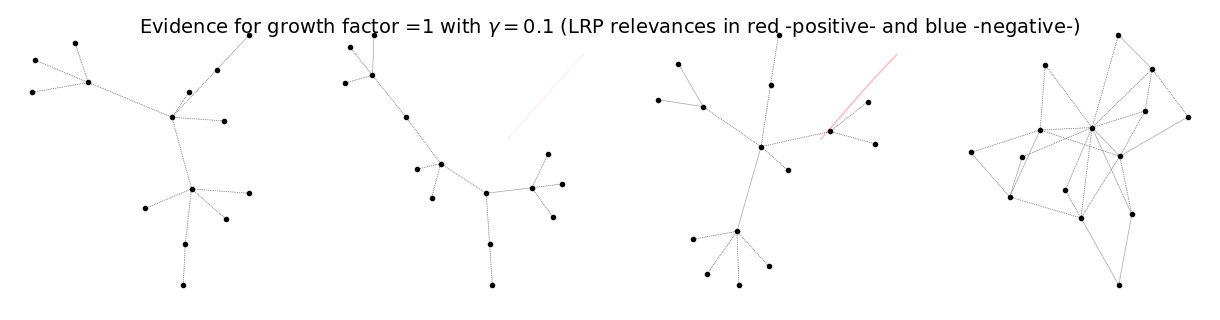

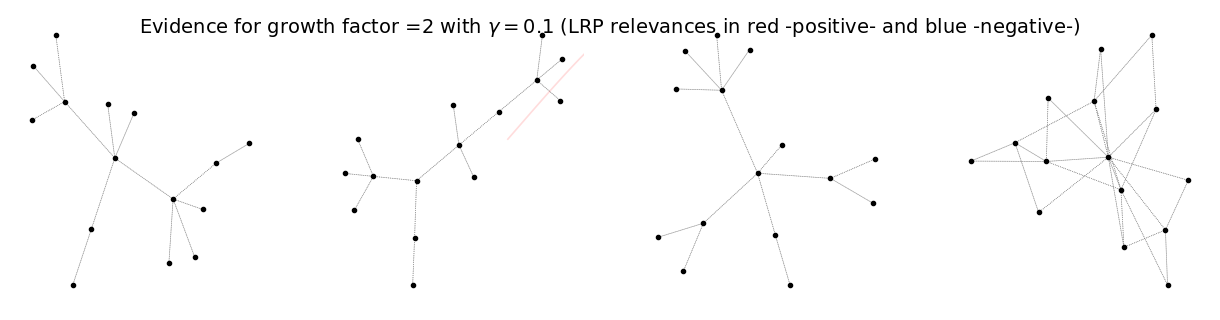

In [ ]:
########################################################################################################################
# [E.] Explain and plot relevances =====================================================================================
########################################################################################################################
def explain_graph_LRP(input_graph: dict, nn: GraphNet, target: int, gamma=None, ax=None):
    """
    Explain a graph prediction through GNN-LRP

    :param input_graph: Dictionary of input graph information
    :param nn: GNN
    :param target: target class
    :param gamma: LRP gamma hyperparameter
    :param ax: Plot axis
    :return:
    """

    # [1.] Plot the underlying graph in black --------------------------------------------------------------------------
    r = input_graph['layout']
    r = r - r.min(axis=0)
    r = r / r.max(axis=0) * 2 - 1

    N = len(input_graph['adjacency'])
    for i in np.arange(N):
        for j in np.arange(N):
            if input_graph['adjacency'][i, j] > 0 and i != j: plt.plot([r[i, 0], r[j, 0]], [r[i, 1], r[j, 1]],
                                                                       color='gray',
                                                                       lw=0.5,
                                                                       ls='dotted')
    ax.plot(r[:, 0], r[:, 1], 'o', color='black', ms=3)

    # [2.] For all walks of length 3 compute and plot the relevances ---------------------------------------------------
    for (i, j, k) in input_graph['walks']:

        R = nn.lrp_computation(input_graph['laplacian'], gamma, target, (j, k))[i].sum()
        tx, ty = relevance_curves_xy_computation([r[i, 0], r[j, 0], r[k, 0]], [r[i, 1], r[j, 1], r[k, 1]])

        # Positive (red) or negative (blue) relevance defines the explanation colorbar ----------------------------------------------------------
        # Depending on the intensity of the relevance, define the transparency parameter alpha -------------------------
        if R > 0.0:
            alpha = np.clip(20 * R.data.numpy(), 0, 1)
            ax.plot(tx, ty, alpha=alpha, color='red', lw=1.2)

        if R < -0.0:
            alpha = np.clip(-20 * R.data.numpy(), 0, 1)
            ax.plot(tx, ty, alpha=alpha, color='blue', lw=1.2)


########################################################################################################################
# Generate new graph - new test sample ---------------------------------------------------------------------------------
# Pass this example through the GNN and compute the relevance of the paths of this graph -------------------------------
#
# Red denotes positive relevance/contribution to the predicted class, even if it's a wrong prediction ------------------
# Blue denotes negative relevance/contribution to the predicted class, even it it's a wrong prediction -----------------
########################################################################################################################
gamma = 0.1

for target in [0, 1]:

    plt.figure(figsize=(3 * len(sample_ids), 3))

    for ids, seed in enumerate(sample_ids):
        ax = plt.subplot(1, len(sample_ids), ids + 1)
        example_graph = create_scale_free_graph(nodes_nr, input_seed=seed, embed=True)

        # Explain with LRP ---------------------------------------------------------------------------------------------
        explain_graph_LRP(example_graph, model, target, gamma=gamma, ax=ax)
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

        plt.axis('off')
        plt.xlim(-1.2, 1.2)
        plt.ylim(-1.2, 1.2)

    plt.suptitle(f"Evidence for growth factor ={target + 1} with $\gamma={gamma}$ (LRP relevances in red -positive- and blue -negative-)", size=14)
    plt.show()
    plt.close()
